## Problem statement for K-NN Algorithm: There is a Car manufacturer company that has manufactured a new SUV car. The company wants to give the advert to the users who are interested in buying that SUV

## Import the required Libraries

In [104]:
#Load the required libraries
import scipy
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [105]:
#Load the dataset
data=pd.read_csv("SUV_Purchase.csv")
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


## Explore the Dataset

In [106]:
data.shape

(400, 5)

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [108]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


## Handling Missing Data

In [109]:
#check for null values or missing values
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [110]:
#check for duplicate values
data.duplicated().sum()

0

## Extracting Independent and Dependent Variable 

In [111]:
#deicide input features
#Age and estimated Salary as Independent /Predictor variables
#Purchased as Dependent or Target Variable

In [112]:
x=data.iloc[:,1:4]


In [113]:
x=pd.get_dummies(x)
x.values


array([[   19, 19000,     0,     1],
       [   35, 20000,     0,     1],
       [   26, 43000,     1,     0],
       ...,
       [   50, 20000,     1,     0],
       [   36, 33000,     0,     1],
       [   49, 36000,     1,     0]], dtype=int64)

In [114]:
y=data.iloc[:,4]
y.values

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [115]:
y.shape

(400,)

In [124]:
#Above y vector is single dimesnsion 
#reshape it to 2D as fit() and predict() methods of ML needs 2D to operate on them
y=data.iloc[:,4].values.reshape(-1,1)
y.shape

(400, 1)

## Encode Categorical data

In [117]:
#Encode the categorical data - Purchased

In [118]:
"""from sklearn.preprocessing import LabelEncoder
labelencoder_y=LabelEncoder()
y=labelencoder_y.fit_transform(y)
y.shape
"""

'from sklearn.preprocessing import LabelEncoder\nlabelencoder_y=LabelEncoder()\ny=labelencoder_y.fit_transform(y)\ny.shape\n'

In [125]:
x.shape

(400, 4)

In [126]:
y.shape

(400, 1)

## Spiltting the Data into Training Set and Test Set 

In [141]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
x_train.shape


(300, 4)

In [142]:
y_train.shape


(300, 1)

In [143]:
x_test.shape


(100, 4)

In [146]:
y_test.shape

(100, 1)

In [145]:
#Feature Scaling

In [147]:
from sklearn.preprocessing import StandardScaler
st_scale = StandardScaler()
x_train=st_scale.fit_transform(x_train)
x_test =st_scale.fit_transform(x_test)

##  Fiiting the Model(KNN-Classifier) to Training dataset

In [149]:
from sklearn.neighbors import KNeighborsClassifier
classifier =KNeighborsClassifier(n_neighbors=5,weights = 'uniform',algorithm ='kd_tree',leaf_size=30,metric ='minkowski', p=2)
classifier.fit(x_train,y_train)

C:\Users\Skhot\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(algorithm='kd_tree')

## Testing the model on Test Data

In [151]:
#predicting the test results
y_pred =classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

## Evaluating the model performanve 

In [155]:
#check for accuracy
from sklearn.metrics import accuracy_score
accuracy =accuracy_score(y_test,y_pred)
accuracy

0.92

In [ ]:
# Create Confusion Matrix

In [153]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[63,  5],
       [ 3, 29]], dtype=int64)

## Visualizing the test Result

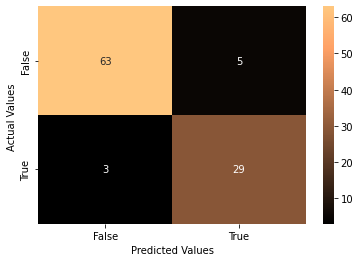

In [159]:
ax = sns.heatmap(cm, annot=True, cmap='copper')

ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

#Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

In [161]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        68
           1       0.85      0.91      0.88        32

    accuracy                           0.92       100
   macro avg       0.90      0.92      0.91       100
weighted avg       0.92      0.92      0.92       100

